In [1]:
from web_crawler_naver_index import korean_index_naver, KPI200
from json_crawler_naver_index import global_index_naver, SnP500

import pandas as pd

In [2]:
# 데이터 불러오기
start_date = "2008-1-1"
end_date = "2017-12-31"
kospi200 = korean_index_naver(KPI200, start_date, end_date)
sp500 = global_index_naver(SnP500, start_date, end_date)

In [3]:
# 시계열 데이터 처리
kospi200 = pd.Series(kospi200)
sp500 = pd.Series(sp500)
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}
data_frame = pd.DataFrame(tmp)
data_frame

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2017-12-22,2683.34,321.21
2017-12-26,2680.50,318.89
2017-12-27,2682.62,320.25
2017-12-28,2687.54,324.74


In [4]:
# 데이터 보간 : 나라별로 휴장일이 달라 비어있는 데이터가 존재
# => 앞이나 뒤의 데이터로 보간한다
data_frame = data_frame.fillna(method="ffill")  # 앞의 데이터로 보간
# 앞의 데이터가 없는 경우에는 뒤에 데이터로 보간
if data_frame.isnull().values.any():
    data_frame = data_frame.fillna(method="bfill")

In [5]:
import matplotlib.pyplot as plt
# 노트북 워크스페이스 상의 결과 화면에 그래프가 함께 부려지도록 지정
%matplotlib inline

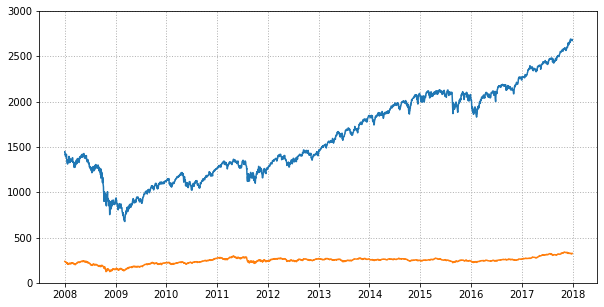

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(data_frame['S&P500'])
plt.plot(data_frame['KOSPI200'])
plt.ylim([0, 3000])
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

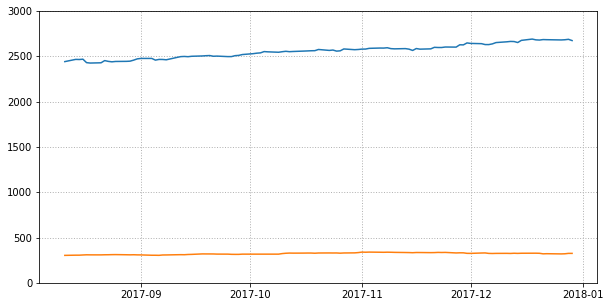

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data_frame['S&P500'].tail(100))
plt.plot(data_frame['KOSPI200'].tail(100))
plt.ylim([0, 3000])
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

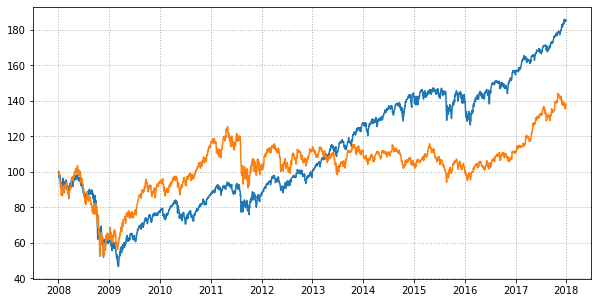

In [15]:
# 지수화 후 시각화
import datetime as dt
pivot_data = data_frame.loc[dt.date(2008, 1, 2)]

plt.figure(figsize=(10, 5))
plt.plot(data_frame['S&P500']/pivot_data["S&P500"]*100)
plt.plot(data_frame["KOSPI200"]/pivot_data["KOSPI200"]*100)
plt.grid(True, color="0.7", linestyle=":", linewidth=1)

In [17]:
# 2016년도 이후 데이터 지수화
data_frame_2016 = data_frame.loc[dt.date(2016, 1, 1):]/data_frame.loc[dt.date(2016, 1, 4)]*100
data_frame_2016.head(3)

,S&P500,KOSPI200
2016-01-04,100.000000,100.000000
2016-01-05,100.201226,100.639304
2016-01-06,98.887045,99.987214


In [18]:
# 회귀 분석 : S&P가 KOSPI에 미치는 영향
import numpy as np
from sklearn.linear_model import LinearRegression

# y : KOSPI, x: S&P
x = data_frame_2016["S&P500"]
y = data_frame_2016["KOSPI200"]

# LinearRegression을 사용하기 위한 벡터 형태 변경 i.e transpose
independent_variable = np.array(x).reshape(-1, 1)
dependent_variable = np.array(y).reshape(-1, 1)

# Linear Regression
reg = LinearRegression()
reg.fit(independent_variable, dependent_variable)

result = {
    "Slope" : reg.coef_[0,0],
    "Intercept": reg.intercept_[0],
    "R^2": reg.score(independent_variable, dependent_variable)
}
result

{'Slope': 1.2880889473807513,
 'Intercept': -28.2257026466376,
 'R^2': 0.9210659719797479}

Text(0, 0.5, 'KOSPI200')

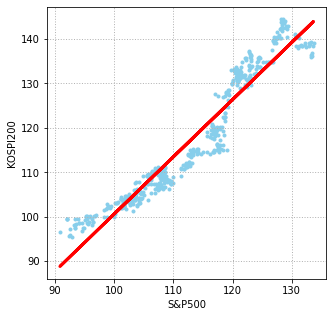

In [19]:
# 선형 회귀 시각화
plt.figure(figsize=(5,5))
plt.scatter(independent_variable, dependent_variable, marker=".", color="skyblue")
plt.plot(independent_variable, reg.predict(independent_variable), color="r", linewidth=3)
plt.grid(True, color="0.7", linestyle=":", linewidth=1)
plt.xlabel("S&P500")
plt.ylabel("KOSPI200")